<a href="https://colab.research.google.com/github/intellisol/amazon_nlp/blob/master/CW_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Amazon fine foods review analysis

Part 2 

3.   Vector space representation
2.   Try diff models



In [3]:
pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.4.5-cp36-none-any.whl size=16025 sha256=b4e9434afeb77fce7f03168a14b866f5e30745ac3e9efe7d56a1cb47f807a75b
  Stored in directory: /root/.cache/pip/wheels/fa/70/d9/6a27d7fdddb6a7c10af68fffaf6f0a96846c750a840280f7bc
Successfully built pandarallel


In [6]:
import nltk
import re
import numpy as np
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
from multiprocessing import  Pool
from nltk.corpus import wordnet

from pandarallel import pandarallel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
sourcefile = "/content/drive/My Drive/Colab Notebooks/train.csv"
stemfile = "/content/drive/My Drive/Colab Notebooks/train_stemmer.csv"
lemfile = "/content/drive/My Drive/Colab Notebooks/train_lem.csv"
cv_train_file = "/content/drive/My Drive/Colab Notebooks/cv_train.csv"

In [0]:
traindf = pd.read_csv(lemfile)

100%|██████████| 104630/104630 [00:00<00:00, 1292042.62it/s]


Text(0, 0.5, 'Number of Words')

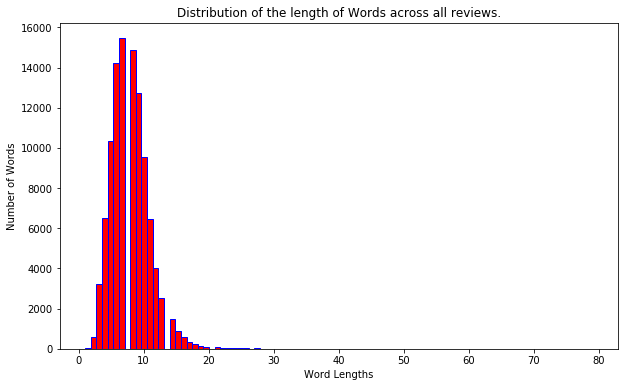

In [48]:
#We will now check the Lemmatized words and see its distribution by length
from tqdm import tqdm
total_words = []
for review in tqdm(traindf['Lemmat'].values):
    filtered_sentence=[]   
    for word in review.split():
      total_words.append(word)

total_words = list(set(total_words)) #Get list of unique words.

#A list to hold the length of each words used in all the reviews used across the whole dataset.
dist = []
for i in tqdm(total_words):
    length = len(i)
    dist.append(length)

# matplotlib histogram to see the distribution of the length of words
plt.figure(figsize=(10,6))
plt.hist(dist, color = 'red', edgecolor = 'blue', bins =90)
plt.title('Distribution of the length of Words across all reviews.')
plt.xlabel('Word Lengths')
plt.ylabel('Number of Words')

Checking if single words show how positive or negative the review is

In [18]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309190 entries, 0 to 309189
Data columns (total 11 columns):
Unnamed: 0    309190 non-null int64
Id            309190 non-null int64
Score         309190 non-null int64
Time          309190 non-null int64
Review        309190 non-null object
Positivity    309190 non-null int64
Tokens        309190 non-null object
PortStem      309190 non-null object
SnowStem      309190 non-null object
LancStem      309190 non-null object
Lemmat        309190 non-null object
dtypes: int64(5), object(6)
memory usage: 25.9+ MB


In [0]:
bag_of_postive_words = [] 
bag_of_negative_words = []

def bif_words(row):
  words = row['Lemmat'].split()
  for word in words:
    if row['Positivity'] == 1:
      bag_of_postive_words.append(word)
    else:
      bag_of_negative_words.append(word)  

In [28]:
traindf.apply(bif_words, axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
309185    None
309186    None
309187    None
309188    None
309189    None
Length: 309190, dtype: object

Look at the freq distribution of words in Positive and Negative bags:

In [31]:
bag_of_negative_words

['some',
 'damage',
 'the',
 'shipment',
 'of',
 'the',
 'dog',
 'food',
 'be',
 'quick',
 'however',
 'when',
 'i',
 'open',
 'the',
 'main',
 'box',
 'which',
 'contain',
 'several',
 'small',
 'container',
 'there',
 'be',
 'an',
 'awful',
 'smell',
 'which',
 'i',
 'discover',
 'be',
 'a',
 'busted',
 'can',
 'of',
 'dog',
 'food',
 'other',
 'than',
 'that',
 'the',
 'product',
 'be',
 'as',
 'expect',
 'less',
 'than',
 'satisfactory',
 'i',
 'give',
 'the',
 'brooklyn',
 'k',
 'cup',
 'away',
 'as',
 'a',
 'gift',
 'i',
 'will',
 'not',
 'buy',
 'this',
 'particular',
 'brand',
 'again',
 'brooklyn',
 'french',
 'roast',
 'k',
 'cup',
 'coffee',
 'be',
 'not',
 'one',
 'of',
 'my',
 'favorite',
 'it',
 's',
 'not',
 'awful',
 'it',
 's',
 'okay',
 'if',
 'you',
 're',
 'in',
 'a',
 'pinch',
 'and',
 'it',
 's',
 'the',
 'only',
 'pod',
 'you',
 'have',
 'i',
 'end',
 'up',
 'give',
 'my',
 'entire',
 'box',
 'to',
 'a',
 'friend',
 'i',
 'wasn',
 't',
 'a',
 'fan',
 'there',
 'b

In [32]:
bag_of_postive_words

['great',
 'for',
 'the',
 'price',
 'i',
 'have',
 'to',
 'say',
 'i',
 'be',
 'a',
 'little',
 'apprehensive',
 'to',
 'buy',
 'this',
 'product',
 'for',
 'the',
 'price',
 'but',
 'i',
 'like',
 'to',
 'keep',
 'my',
 'k',
 'cup',
 'price',
 'under',
 'and',
 'sam',
 's',
 'club',
 'be',
 'sell',
 'out',
 'at',
 'the',
 'time',
 'and',
 'i',
 'try',
 'this',
 'the',
 'fuhgeddaboudit',
 'be',
 'very',
 'strong',
 'but',
 'that',
 's',
 'how',
 'i',
 'like',
 'it',
 'overall',
 'i',
 'be',
 'impressed',
 'awesome',
 'coffee',
 'receive',
 'my',
 'free',
 'k',
 'cup',
 'as',
 'a',
 'sample',
 'promotion',
 'and',
 'love',
 'them',
 'i',
 'have',
 'at',
 'least',
 'one',
 'a',
 'day',
 'at',
 'work',
 'brooklyn',
 'bean',
 'roastery',
 'breakfast',
 'blend',
 'k',
 'cup',
 'brooklyn',
 'bean',
 'roastery',
 'blend',
 'k',
 'cup',
 'be',
 'great',
 'taste',
 'coffee',
 'i',
 'like',
 'the',
 'breakfast',
 'blend',
 'flavor',
 'the',
 'best',
 'it',
 'be',
 'light',
 'taste',
 'and',
 'i

In [33]:
freq_dist_positive=nltk.FreqDist(bag_of_postive_words)
freq_dist_negative=nltk.FreqDist(bag_of_negative_words)
print("Most Common Positive Words : ",freq_dist_positive.most_common(20))
print("Most Common Negative Words : ",freq_dist_negative.most_common(20))

Most Common Positive Words :  [('the', 761748), ('be', 744608), ('i', 689248), ('and', 565378), ('a', 524464), ('it', 462917), ('to', 424833), ('of', 327897), ('this', 290240), ('have', 258158), ('for', 250721), ('in', 238583), ('my', 204832), ('that', 176650), ('you', 164299), ('with', 155386), ('but', 148222), ('s', 133689), ('good', 130485), ('not', 125007)]
Most Common Negative Words :  [('the', 283340), ('be', 260031), ('i', 242405), ('and', 151989), ('a', 151507), ('it', 151269), ('to', 138583), ('of', 115406), ('this', 95354), ('have', 82172), ('not', 81182), ('in', 72666), ('for', 68800), ('that', 68013), ('but', 66558), ('t', 54044), ('my', 52286), ('taste', 47247), ('you', 46205), ('like', 44100)]


In [45]:
print('No. of words in negative reviews', len(bag_of_negative_words))
print('No. of words in positive reviews', len(bag_of_postive_words))
count = (len(bag_of_postive_words)*1)/(len(bag_of_negative_words*1))
print('Positive words are {:3.2} times more than negative words'.format(count) )

No. of words in negative reviews 6410718
No. of words in positive reviews 19694174
Positive words are 3.1 times more than negative words


# Vectorization

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
#recommendation to avoid stop words, we have already removed stop words in tokenization step, so we ommit this.
# we also excluded no and not from the list

##Count Vectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer


As a rule, ignore words not in atleast 10 documents, and which appear frequently in more than 60% of documents

In [0]:
vect1 = CountVectorizer(min_df=10,max_df=0.6, lowercase=True,strip_accents='ascii').fit(traindf['Lemmat'])
#vect1 is unigram 

In [0]:
vect1_1 = CountVectorizer(min_df=0.01,max_df=0.6, lowercase=True,strip_accents='ascii').fit(traindf['Lemmat'])
#vect1 is unigram

In [68]:
print(vect1)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.6, max_features=None, min_df=10,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents='ascii', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [69]:
feature_names = vect1.get_feature_names()
print('No. of features in Uni-gram Vect = ',len(feature_names))

No. of features in Uni-gram Vect =  17872


In [70]:
print('First 100 Features are: \n{}'.format(feature_names[:100]))

First 100 Features are: 
['aa', 'aaa', 'aaah', 'aafco', 'ab', 'aback', 'abandon', 'abbey', 'abbott', 'abby', 'abc', 'abd', 'abdomen', 'abdominal', 'abhor', 'abide', 'ability', 'abit', 'able', 'abnormal', 'abnormality', 'aboard', 'abomination', 'abound', 'about', 'above', 'abrasive', 'abroad', 'abruptly', 'absence', 'absent', 'absinthe', 'absolute', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absorbable', 'absorbed', 'absorbent', 'absorber', 'absorbs', 'absorbtion', 'absorption', 'absoultely', 'abstain', 'absurd', 'absurdly', 'abt', 'abuelita', 'abundance', 'abundant', 'abuse', 'abused', 'abut', 'abv', 'abysmal', 'ac', 'acacia', 'academy', 'acai', 'acana', 'accelerade', 'accelerate', 'accent', 'accentuate', 'accept', 'acceptable', 'acceptance', 'access', 'accessible', 'accessory', 'accident', 'accidental', 'accidentally', 'accidently', 'acclimate', 'accolade', 'accommodate', 'accomodate', 'accompaniment', 'accompany', 'accomplish', 'accomplished', 'accomplishment', 'accord', 'ac

In [71]:
print("Last 100 Features:\n{}".format(feature_names[100:]))

Last 100 Features:
['accustom', 'accustomed', 'ace', 'acerola', 'acesulfame', 'acetate', 'acetic', 'ache', 'achieve', 'achievement', 'achiote', 'achy', 'acid', 'acidic', 'acidity', 'acidophilus', 'acids', 'acidy', 'ack', 'ackee', 'acknowledge', 'acme', 'acne', 'acorn', 'acquaint', 'acquaintance', 'acquire', 'acquired', 'acquisition', 'acre', 'acrid', 'across', 'acrylic', 'act', 'acting', 'action', 'activate', 'active', 'actively', 'activia', 'activity', 'actor', 'actual', 'actuality', 'actually', 'actualy', 'acupuncturist', 'acutally', 'acute', 'acv', 'ad', 'adage', 'adagio', 'adam', 'adamant', 'adapt', 'adaptable', 'adaptation', 'adapter', 'adaptor', 'add', 'added', 'addendum', 'addict', 'addicted', 'addicting', 'addiction', 'addictive', 'addictively', 'addition', 'additional', 'additionally', 'additive', 'additives', 'address', 'ade', 'adept', 'adequate', 'adequately', 'adhd', 'adhere', 'adhesive', 'adjacent', 'adjective', 'adjunct', 'adjust', 'adjustable', 'adjusting', 'adjustment',

In [0]:
vect2 = CountVectorizer(min_df=10,max_df=.6,lowercase=True,strip_accents='ascii', ngram_range=(1,2)).fit(traindf['Lemmat'])
#vect2 is bi-gram 

In [0]:
vect2_2 = CountVectorizer(min_df=.01,max_df=.6,lowercase=True,strip_accents='ascii', ngram_range=(1,2)).fit(traindf['Lemmat'])
#vect2_2 is bi-gram , but with lesser features


In [76]:
feature_names_2 = vect2.get_feature_names()
print('Bigram features are total of : ', len(feature_names_2))
print('First 100 Features are: \n {}'.format(feature_names_2[:100]))

Bigram features are total of :  210470
First 100 Features are: 
 ['aa', 'aaa', 'aaah', 'aafco', 'ab', 'aback', 'aback by', 'abandon', 'abandon the', 'abbey', 'abbott', 'abby', 'abc', 'abd', 'abdomen', 'abdominal', 'abdominal pain', 'abhor', 'abide', 'abide by', 'ability', 'ability and', 'ability of', 'ability to', 'abit', 'able', 'able to', 'abnormal', 'abnormality', 'aboard', 'abomination', 'abound', 'about', 'about about', 'about add', 'about additive', 'about after', 'about agave', 'about all', 'about allergy', 'about also', 'about amazon', 'about an', 'about and', 'about another', 'about any', 'about anyone', 'about anything', 'about anywhere', 'about arsenic', 'about artificial', 'about as', 'about at', 'about average', 'about baby', 'about bad', 'about bag', 'about bake', 'about bar', 'about be', 'about bean', 'about because', 'about before', 'about big', 'about bite', 'about black', 'about blue', 'about bob', 'about both', 'about bottle', 'about bowel', 'about box', 'about bpa',

In [77]:
feature_names_2_2 = vect2_2.get_feature_names()
print('Bigram features are total of : ', len(feature_names_2_2))
print('First 100 Features are: \n {}'.format(feature_names_2_2[:100]))

Bigram features are total of :  1365
First 100 Features are: 
 ['able', 'able to', 'about', 'about it', 'about the', 'about this', 'absolutely', 'actually', 'add', 'add to', 'addition', 'after', 'aftertaste', 'again', 'ago', 'agree', 'all', 'all of', 'all the', 'allergy', 'almond', 'almost', 'along', 'along with', 'already', 'also', 'alternative', 'alternative to', 'although', 'always', 'amaze', 'amazing', 'amazon', 'amazon and', 'amazon be', 'amount', 'amount of', 'an', 'an excellent', 'and be', 'and can', 'and do', 'and don', 'and find', 'and get', 'and good', 'and have', 'and he', 'and in', 'and it', 'and just', 'and love', 'and make', 'and my', 'and no', 'and not', 'and save', 'and she', 'and so', 'and taste', 'and that', 'and the', 'and then', 'and there', 'and they', 'and this', 'and use', 'and very', 'and we', 'and will', 'and you', 'another', 'any', 'any other', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apple', 'area', 'aren', 'aroma', 'around', 'arrive', 'artific

In [0]:
vect3 = CountVectorizer(min_df=10,lowercase=True,strip_accents='ascii', ngram_range=(1,3)).fit(traindf['Lemmat'])
#vect3 is tri-gram 

In [17]:
feature_names_3 = vect3.get_feature_names()
print('Trigram features are total of : ', len(feature_names_3))
print('First 100 Features are: \n {}'.format(feature_names_3[:100]))

Trigram features are total of :  466889
First 2000 Features are: 
 ['aa', 'aaa', 'aaah', 'aafco', 'ab', 'aback', 'aback by', 'aback by the', 'abandon', 'abandon the', 'abbey', 'abbott', 'abby', 'abc', 'abd', 'abdomen', 'abdominal', 'abdominal pain', 'abhor', 'abide', 'abide by', 'ability', 'ability and', 'ability of', 'ability to', 'ability to get', 'ability to have', 'ability to make', 'abit', 'able', 'able to', 'able to achieve', 'able to actually', 'able to add', 'able to adjust', 'able to afford', 'able to be', 'able to beat', 'able to bite', 'able to break', 'able to breastfeed', 'able to brew', 'able to bring', 'able to buy', 'able to carry', 'able to chew', 'able to choose', 'able to come', 'able to compare', 'able to consume', 'able to continue', 'able to control', 'able to cook', 'able to create', 'able to cut', 'able to destroy', 'able to detect', 'able to determine', 'able to digest', 'able to do', 'able to drink', 'able to easily', 'able to eat', 'able to enjoy', 'able to f

In [0]:
y_train = pd.array(traindf['Score'])

In [79]:
y_train.shape

(309190,)

In [21]:
y_train.dtype

PandasDtype('int64')

In [0]:
x_train1 = vect1.fit_transform(traindf['Lemmat']) #uni gram

In [0]:
x_train2 = vect2.fit_transform(traindf['Lemmat']) #bi gram

In [0]:
x_train3 = vect3.fit_transform(traindf['Lemmat']) #tri gram

In [0]:
#Special case 
x_train2_2 = vect2_2.fit_transform(traindf['Lemmat'])

In [23]:
x_train1

<309190x17879 sparse matrix of type '<class 'numpy.int64'>'
	with 15981668 stored elements in Compressed Sparse Row format>

In [0]:
y_train = np.asarray(y_train)
np.savetxt("y_train.csv", y_train, delimiter=",")

In [28]:
x_train1

<309190x17879 sparse matrix of type '<class 'numpy.int64'>'
	with 15981668 stored elements in Compressed Sparse Row format>

### TF-IDF

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfvect1 = TfidfVectorizer(min_df=10,strip_accents='ascii')
tfvect2 = TfidfVectorizer(min_df=10,strip_accents='ascii', ngram_range=(1,2))
tfvect3 = TfidfVectorizer(min_df=10,strip_accents='ascii', ngram_range=(1,3))

lemmset = traindf['Lemmat']
x_tftrain1 = tfvect1.fit_transform(traindf['Lemmat']) #uni gram
x_tftrain2 = tfvect2.fit_transform(traindf['Lemmat']) #bi gram
x_tftrain3 = tfvect3.fit_transform(traindf['Lemmat']) #tri gram

In [0]:
tfid_feature_names1 = tfvect1.get_feature_names()
tfid_feature_names2 = tfvect2.get_feature_names()
tfid_feature_names3 = tfvect3.get_feature_names()


In [32]:
def print_comp_tabline(val1, val2, val3):
  print("{:<10} | {:<10}  | {}".format(val1, val2, val3))

print("N-Gram Comparison")
print("------------------------------------------")
print_comp_tabline('Vectoriser','N-gram','No.Features')
print("------------------------------------------")
print_comp_tabline('CountVect.','1-gram',len(feature_names))
print_comp_tabline('CountVect.','2-gram',len(feature_names_2))
print_comp_tabline('CountVect.','3-gram',len(feature_names_3))
print("------------------------------------------")
print_comp_tabline('TfidfVect.','1-gram',len(tfid_feature_names1))
print_comp_tabline('TfidfVect.','2-gram',len(tfid_feature_names2))
print_comp_tabline('TfidfVect.','3-gram',len(tfid_feature_names3))
print("------------------------------------------")

N-Gram Comparison
------------------------------------------
Vectoriser | N-gram      | No.Features
------------------------------------------
CountVect. | 1-gram      | 17879
CountVect. | 2-gram      | 210477
CountVect. | 3-gram      | 466889
------------------------------------------
TfidfVect. | 1-gram      | 17879
TfidfVect. | 2-gram      | 210477
TfidfVect. | 3-gram      | 466889
------------------------------------------


In [33]:
print(x_train1[1])

  (0, 7176)	1
  (0, 10268)	1
  (0, 3768)	1
  (0, 590)	1
  (0, 937)	2
  (0, 1047)	1
  (0, 3014)	1
  (0, 12750)	1
  (0, 6215)	1
  (0, 861)	1
  (0, 13590)	1
  (0, 12299)	1
  (0, 9199)	1
  (0, 15847)	1
  (0, 8857)	1
  (0, 10872)	1
  (0, 3914)	1
  (0, 17599)	1


In [34]:
print(x_train2[1])

  (0, 79074)	1
  (0, 112775)	1
  (0, 44623)	1
  (0, 6748)	1
  (0, 13826)	2
  (0, 14889)	1
  (0, 37999)	1
  (0, 145954)	1
  (0, 68822)	1
  (0, 12534)	1
  (0, 151690)	1
  (0, 141547)	1
  (0, 102421)	1
  (0, 181167)	1
  (0, 97333)	1
  (0, 125405)	1
  (0, 45987)	1
  (0, 206779)	1
  (0, 14913)	1
  (0, 38413)	1
  (0, 146021)	1
  (0, 113279)	1
  (0, 68901)	1
  (0, 44647)	1
  (0, 13292)	1
  (0, 141548)	1
  (0, 8393)	1
  (0, 102823)	1
  (0, 181372)	1
  (0, 79146)	1
  (0, 14018)	1
  (0, 97405)	1
  (0, 125534)	1
  (0, 46012)	1
  (0, 14232)	1


In [35]:
print(x_tftrain1[1])

  (0, 17599)	0.2128372353207708
  (0, 3914)	0.20423784369739095
  (0, 10872)	0.14574397685435148
  (0, 8857)	0.2768556000904328
  (0, 15847)	0.15209062300502818
  (0, 9199)	0.1381253438731567
  (0, 12299)	0.508976570417953
  (0, 13590)	0.33535424375834
  (0, 861)	0.1347862362648753
  (0, 6215)	0.22044226172642492
  (0, 12750)	0.2551410868759885
  (0, 3014)	0.18901293252794021
  (0, 1047)	0.2799807407484718
  (0, 937)	0.29171769517674534
  (0, 590)	0.07343320961225547
  (0, 3768)	0.21164751470480517
  (0, 10268)	0.10457129449538814
  (0, 7176)	0.09576755051587832


In [36]:
print(x_tftrain1[2])

  (0, 12551)	0.08556049797636553
  (0, 1131)	0.09991966465688103
  (0, 17334)	0.05195430489389915
  (0, 1875)	0.16250449358099772
  (0, 7803)	0.029856326435706567
  (0, 6693)	0.07296474625717665
  (0, 17391)	0.05820773798823032
  (0, 5944)	0.10251597679771161
  (0, 15451)	0.06367449307766568
  (0, 9464)	0.1124596840724472
  (0, 14117)	0.09647920428222653
  (0, 4681)	0.12108037171586826
  (0, 15901)	0.11356885672130813
  (0, 13242)	0.08513814928298476
  (0, 3820)	0.18144993582530097
  (0, 13324)	0.08585744176806452
  (0, 3880)	0.08367730499975315
  (0, 16775)	0.10552316265891079
  (0, 17770)	0.07524253904787617
  (0, 17167)	0.23002861558518387
  (0, 5667)	0.08415800129291512
  (0, 9621)	0.049784651990582095
  (0, 15393)	0.08909131793017024
  (0, 8976)	0.16236525299831936
  (0, 1407)	0.10438562868338773
  (0, 5941)	0.22147949645841736
  (0, 15637)	0.07709582871032808
  (0, 1573)	0.3264499268469639
  (0, 1840)	0.25786760491893845
  (0, 13328)	0.35367752531893465
  (0, 1268)	0.167664934902

In [0]:
# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [0]:
top_tfidf = top_tfidf_feats(x_tftrain2[1,:].toarray()[0],tfid_feature_names2,25)

In [39]:
print(top_tfidf)

           feature     tfidf
0    promotion and  0.292748
1         free cup  0.286848
2          my free  0.274265
3   coffee receive  0.254451
4        as sample  0.254124
5   awesome coffee  0.247766
6        promotion  0.232790
7           cup as  0.223027
8           day at  0.214870
9        least one  0.211546
10         have at  0.200322
11      receive my  0.183493
12       them have  0.183293
13         one day  0.175628
14         at work  0.162801
15          sample  0.153380
16        and love  0.137743
17              at  0.133423
18        at least  0.131323
19         awesome  0.128054
20           least  0.126625
21       love them  0.123582
22         receive  0.116694
23            free  0.100823
24            work  0.097345




---


As seen from the *bag_of_positive_words* and *bag_of_negative_words*, 
single words repeat in both sets, so it will not be easy to diffrentiate between positive and negative reviews considering only single words/unigrams, hence we should try to classify based on bigrams or trigrams

# Test the representations

Comparison

In [0]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [0]:
list_of_sent = []
for sent in final_4000['Text'].values:
    filtered_sentence = []
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

Logistic regression with CountVector, bi-gram

In [0]:
def runLogReg(x,y):
  scores = cross_val_score(LogisticRegression(), x, y, cv=5)
  print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))
  print(scores)
  return scores

In [86]:
score1 = runLogReg(x_train2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean cross-validation accuracy: 0.74
[0.7416637  0.7464504  0.74711343 0.73598758 0.74315146]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [87]:
score1_2 = runLogReg(x_train2_2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mean cross-validation accuracy: 0.73
[0.73100682 0.73286652 0.73213881 0.72877519 0.73188007]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Log Reg with Tfidf, bi gram

In [43]:
score2 = runLogReg(x_tftrain2,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored

In [0]:
#

In [0]:
#from sklearn.model_selection import GridSearchCV

In [0]:
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [0]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)#